In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima
import datetime as dt
sns.set_palette('colorblind')

In [5]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_NonCovid.csv",index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
df2 = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_cleaned.csv",index_col=0)

In [7]:
df2.Month = pd.to_datetime(df2['Month'], format='%Y-%m')

In [8]:
#df = df.reset_index(drop=True)

In [9]:
df.head()

,Crime_ID,Month,Reported_by,Crime_type,Outcome_type,Region,Year
0,9500972e2e3c87dc23b65885dd61085ee8a39329c03792...,2017-01,Avon and Somerset Constabulary,Theft offences,Other Outcome,South West,2017
1,4c3b7072a3bfcf441b1036e67fd642cf1e42fdccf16af1...,2017-01,Avon and Somerset Constabulary,Criminal damage and arson,No suspect identified,South West,2017
2,8e6ae250f68623b82068cd3c79b64b05a559f6d9c9393c...,2017-01,Avon and Somerset Constabulary,Criminal damage and arson,No suspect identified,South West,2017
3,0f5c81322cd60d96ef8877d94eb37e98cad395d1773efc...,2017-01,Avon and Somerset Constabulary,Violence and sexual offences,No suspect identified,South West,2017
4,b46b395f390b0dc9112686c30d0939f0ded0de42877df7...,2017-01,Avon and Somerset Constabulary,Violence and sexual offences,No suspect identified,South West,2017


In [10]:
df['Crime_type'].value_counts()

Violence and sexual offences    4009138
Theft offences                  3592460
Criminal damage and arson       1406043
Public order offences            965265
Drug offences                    367286
Name: Crime_type, dtype: int64

In [11]:
df.Month = pd.to_datetime(df['Month'], format='%Y-%m')

In [12]:
grouped = df.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped = grouped.reset_index().rename(columns={'Crime_ID':'Count'})

In [13]:
grouped2 = df2.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped2 = grouped2.reset_index().rename(columns={'Crime_ID':'Count'})

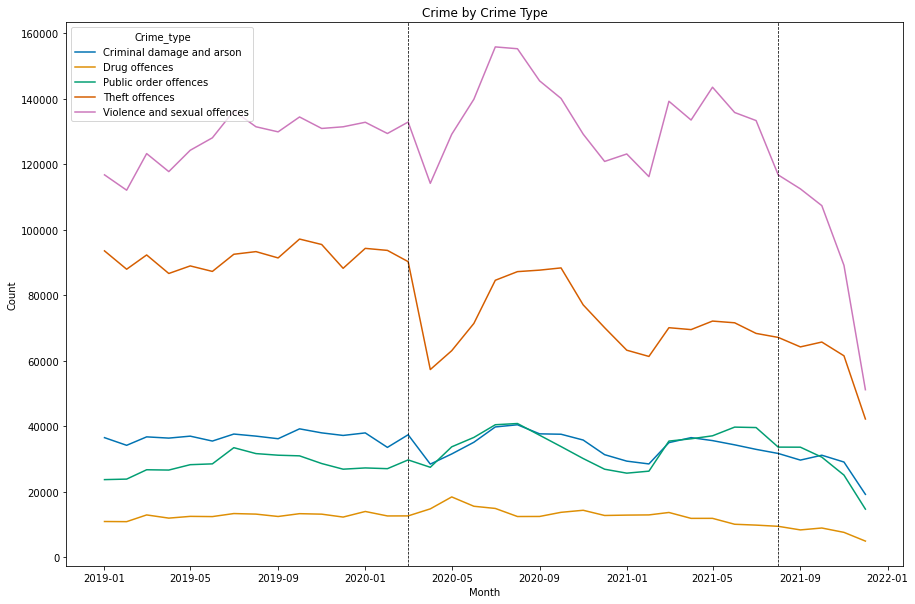

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(data=grouped2,x='Month',y='Count', hue='Crime_type')
plt.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
plt.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
plt.title('Crime by Crime Type')
plt.show()

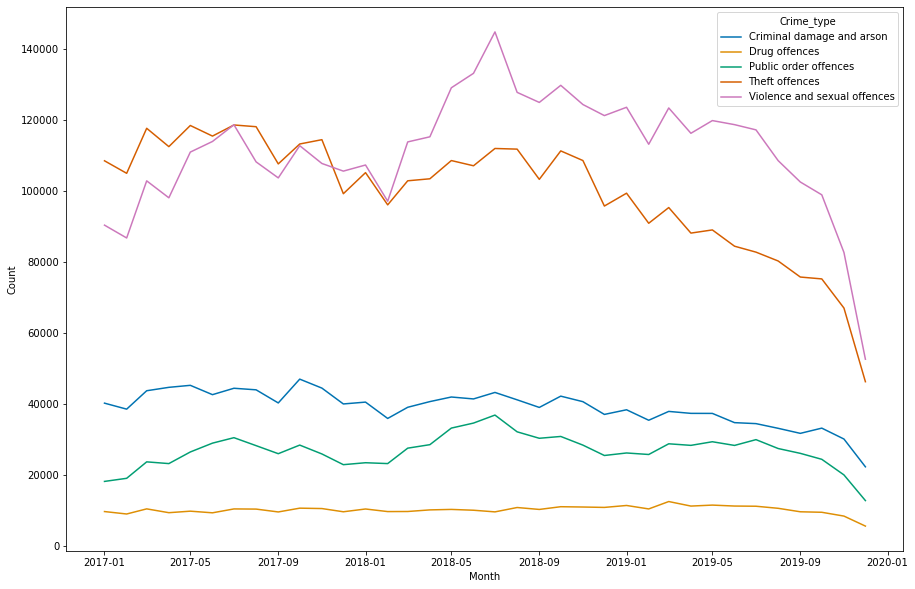

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(data=grouped,x='Month',y='Count', hue='Crime_type')
plt.show()

In [16]:
grouped

,Month,Crime_type,Count
0,2017-01-01,Criminal damage and arson,40283
1,2017-01-01,Drug offences,9726
2,2017-01-01,Public order offences,18221
3,2017-01-01,Theft offences,108601
4,2017-01-01,Violence and sexual offences,90461
...,...,...,...
175,2019-12-01,Criminal damage and arson,22338
176,2019-12-01,Drug offences,5628
177,2019-12-01,Public order offences,12818
178,2019-12-01,Theft offences,46325


<AxesSubplot:ylabel='Frequency'>

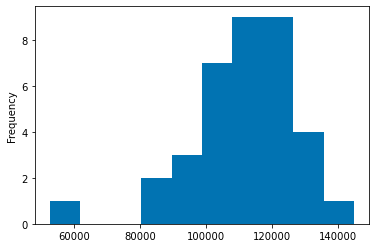

In [17]:
vio = grouped[grouped['Crime_type']=='Violence and sexual offences']
vio = vio.set_index('Month')
vio = vio['Count']
vio_cut = vio[0:12]
vio.plot.hist()

In [18]:
vio2 = grouped2[grouped2['Crime_type']=='Violence and sexual offences']
vio2 = vio2.set_index('Month')
vio2 = vio2['Count']

In [19]:
vio[-1] = 131435
vio[-2] = 130926
vio[-3] = 134433

In [20]:
vio[-12:] = vio2[:12]
vio[-12:]

Month
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [21]:
vio

Month
2017-01-01     90461
2017-02-01     86843
2017-03-01    102943
2017-04-01     98168
2017-05-01    111053
2017-06-01    114047
2017-07-01    118755
2017-08-01    108291
2017-09-01    103779
2017-10-01    112860
2017-11-01    107842
2017-12-01    105687
2018-01-01    107411
2018-02-01     97208
2018-03-01    113921
2018-04-01    115362
2018-05-01    129181
2018-06-01    133258
2018-07-01    144929
2018-08-01    127890
2018-09-01    125052
2018-10-01    129872
2018-11-01    124457
2018-12-01    121339
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [22]:
from statsmodels.tsa.stattools import adfuller
adfuller(vio)[1]

0.1670978086848064

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

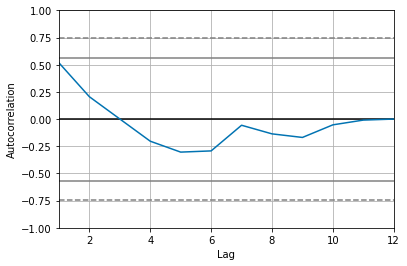

In [23]:
autocorrelation_plot(vio_cut)

In [24]:
train = vio
train

Month
2017-01-01     90461
2017-02-01     86843
2017-03-01    102943
2017-04-01     98168
2017-05-01    111053
2017-06-01    114047
2017-07-01    118755
2017-08-01    108291
2017-09-01    103779
2017-10-01    112860
2017-11-01    107842
2017-12-01    105687
2018-01-01    107411
2018-02-01     97208
2018-03-01    113921
2018-04-01    115362
2018-05-01    129181
2018-06-01    133258
2018-07-01    144929
2018-08-01    127890
2018-09-01    125052
2018-10-01    129872
2018-11-01    124457
2018-12-01    121339
2019-01-01    116769
2019-02-01    112084
2019-03-01    123253
2019-04-01    117756
2019-05-01    124268
2019-06-01    128073
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
Name: Count, dtype: int64

In [25]:
stepwise_fit = auto_arima(train,trace=True,suppress_warnings=True,d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=731.805, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=731.162, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=731.350, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731.961, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=729.945, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=728.905, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=730.041, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=730.445, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=730.028, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=728.723, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=730.410, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=732.002, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=727.149, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=730.711, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=729.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -360.574
Date:                Sun, 03 Jul 2022   AIC                            727.149
Time:                        18:46:10   BIC                            731.815
Sample:                             0   HQIC                           728.759
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0575      0.123     -0.467      0.640      -0.299       0.184
ar.L2          0.1778      0.146      1.214      0.225      -0.109       0.465
sigma2       5.38e+07   6.49e-10   8.29e+16      0.000    5.38e+07    5.38e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.44   Prob(JB):                         0.90
Heteroskedasticity (H):               0.81   Skew:                            -0.07
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+32. Standard errors may be unstable.
"""

In [44]:
from statsmodels.tsa.arima.model import ARIMA
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
model = ARIMA(train, order=(2,1,0),seasonal_order=(1,1,1,12))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+23) 

print(yhat)


2020-01-01    133372.518257
2020-02-01    129119.000232
2020-03-01    140590.189352
2020-04-01    134328.227162
2020-05-01    140927.534035
2020-06-01    144785.056824
2020-07-01    152701.757805
2020-08-01    148339.623571
2020-09-01    146610.477072
2020-10-01    151653.479460
2020-11-01    148058.698235
2020-12-01    148480.974736
2021-01-01    144879.786757
2021-02-01    140256.506921
2021-03-01    151460.925841
2021-04-01    145875.826697
2021-05-01    152397.886405
2021-06-01    156208.937430
2021-07-01    164380.723554
2021-08-01    159600.200696
2021-09-01    158026.907500
2021-10-01    162627.510954
2021-11-01    159110.397999
2021-12-01    159609.406900
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [46]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# train.index = pd.DatetimeIndex(train.index.values,
#                                freq=train.index.inferred_freq)
# model = SARIMAX(train,seasonal_order=(1,1,1,12))
# model_fit = model.fit()
# yhat = model_fit.predict(len(train), len(train)+23) 

# print(yhat)

In [47]:
forecast = model_fit.get_prediction(1)
yhat_conf_int = forecast.conf_int(alpha=0.05)
#yhat_conf_int

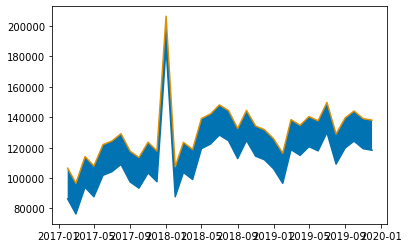

In [48]:
plt.plot(yhat_conf_int.index,yhat_conf_int['lower Count'])
plt.plot(yhat_conf_int.index,yhat_conf_int['upper Count'])
plt.fill_between(yhat_conf_int.index,yhat_conf_int['lower Count'].values, yhat_conf_int['upper Count'].values)

In [49]:
#vio2[:12]

In [50]:
vio3 = pd.concat([vio,vio2[12:]])


In [51]:
#vio3

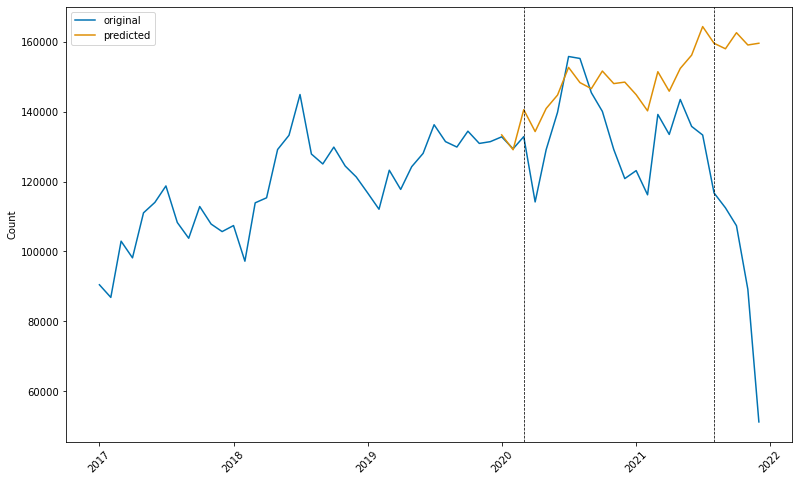

In [52]:
plt.figure(figsize=(13,8))
sns.lineplot(data=vio3,label='original')
sns.lineplot(data=yhat,label='predicted')
plt.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
plt.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
#sns.lineplot(data=yhat_conf_int,label='blah')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [53]:
conked = pd.concat([df,df2])
conked = conked.drop_duplicates(subset='Crime_ID')

In [54]:
grouped3 = conked.groupby(['Month'])['Crime_ID'].count()
grouped3

Month
2017-01-01    267292
2017-02-01    258641
2017-03-01    298701
2017-04-01    288151
2017-05-01    311263
2017-06-01    310667
2017-07-01    322947
2017-08-01    309260
2017-09-01    287493
2017-10-01    312390
2017-11-01    303451
2017-12-01    277668
2018-01-01    287181
2018-02-01    262321
2018-03-01    293338
2018-04-01    298385
2018-05-01    323441
2018-06-01    326690
2018-07-01    346857
2018-08-01    324065
2018-09-01    308203
2018-10-01    325503
2018-11-01    313274
2018-12-01    290712
2019-01-01    310806
2019-02-01    289375
2019-03-01    314810
2019-04-01    300587
2019-05-01    312000
2019-06-01    308069
2019-07-01    313441
2019-08-01    306856
2019-09-01    301408
2019-10-01    315344
2019-11-01    306405
2019-12-01    296220
2020-01-01    306490
2020-02-01    296433
2020-03-01    303034
2020-04-01    242335
2020-05-01    276059
2020-06-01    298666
2020-07-01    335685
2020-08-01    336329
2020-09-01    320657
2020-10-01    313657
2020-11-01    286676
2020-12

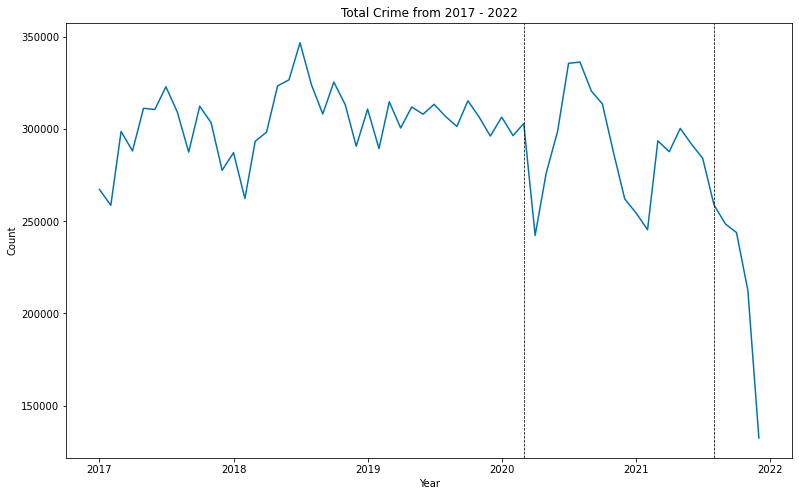

In [55]:
plt.figure(figsize=(13,8))
sns.lineplot(data=grouped3)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Crime from 2017 - 2022')
plt.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
plt.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
plt.show()

In [56]:
grouped4 = conked.groupby(['Month','Crime_type'])['Crime_ID'].count().reset_index()
grouped4

,Month,Crime_type,Crime_ID
0,2017-01-01,Criminal damage and arson,40283
1,2017-01-01,Drug offences,9726
2,2017-01-01,Public order offences,18221
3,2017-01-01,Theft offences,108601
4,2017-01-01,Violence and sexual offences,90461
...,...,...,...
295,2021-12-01,Criminal damage and arson,19252
296,2021-12-01,Drug offences,4987
297,2021-12-01,Public order offences,14742
298,2021-12-01,Theft offences,42251


In [57]:
grouped4

,Month,Crime_type,Crime_ID
0,2017-01-01,Criminal damage and arson,40283
1,2017-01-01,Drug offences,9726
2,2017-01-01,Public order offences,18221
3,2017-01-01,Theft offences,108601
4,2017-01-01,Violence and sexual offences,90461
...,...,...,...
295,2021-12-01,Criminal damage and arson,19252
296,2021-12-01,Drug offences,4987
297,2021-12-01,Public order offences,14742
298,2021-12-01,Theft offences,42251


In [58]:
grouped4['Crime_ID'].loc[(grouped4['Month'] == '2020-01-01')]

180     38005
181     14027
182     27314
183     94328
184    132816
Name: Crime_ID, dtype: int64

In [59]:
def predictions1(df_grouped,crime_type=None,ax=None,**kwargs):
    df_grouped = df_grouped[df_grouped.Crime_type == crime_type]
    df_grouped = df_grouped.set_index('Month').drop(columns='Crime_type').squeeze()
    train = df_grouped[:36]
    #print(train.dtypes)
#     train = train.set_index('Month')
#     train = train.drop(columns='Crime_type')
#     train = train.squeeze()
    
    #print(train)
    #train = train.squeeze()
    train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
    model = ARIMA(train, order=(2,1,0),seasonal_order=(1,1,1,12))
    model_fit = model.fit()
    yhat = model_fit.predict(len(train), len(train)+23) 
    forecast = model_fit.get_forecast(24)
    yhat_conf_int = forecast.conf_int(alpha=0.05)
    #print(yhat)
    #print(df_grouped)
    #print(df_grouped['Crime_ID'].loc[(df_grouped['Month'] == '2020-01-01')])
    yhat.loc['2020-01-01'] = df_grouped.loc['2020-01-01']
    
    ax=ax
    ax.set_title(crime_type)
    ax.set_ylabel('Count')
    ax.set_xlabel('Year')
    #ax.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
    #ax.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
    sns.lineplot(data=df_grouped,label='original',ax=ax)
    sns.lineplot(data=yhat,label='predicted',ax=ax)
    ax.plot(yhat_conf_int.index,yhat_conf_int['lower Crime_ID'],linewidth=0)
    ax.plot(yhat_conf_int.index,yhat_conf_int['upper Crime_ID'],linewidth=0)
    ax.fill_between(yhat_conf_int.index,yhat_conf_int['lower Crime_ID'].values, yhat_conf_int['upper Crime_ID'].values,
                    alpha=0.2)

    #sns.lineplot(data=yhat_conf_int,label='blah')
    return ax

In [60]:
def predictions2(df_grouped,crime_type=None,ax=None,**kwargs):
    train = df_grouped[:36]
    train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
    model = ARIMA(train, order=(2,1,0),seasonal_order=(1,1,1,12))
    model_fit = model.fit()
    yhat = model_fit.predict(len(train), len(train)+23)
    forecast = model_fit.get_forecast(24)
    #print(forecast.conf_int(alpha=0.05))
    yhat_conf_int = forecast.conf_int(alpha=0.05)
    yhat.loc['2020-01-01'] = df_grouped.loc['2020-01-01']
    ax=ax
    ax.set_title('Total Crime')
    ax.set_ylabel('Count')
    ax.set_xlabel('Year')
    #ax.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
    #ax.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
    sns.lineplot(data=df_grouped,label='original',ax=ax)
    sns.lineplot(data=yhat,label='predicted',ax=ax)
    ax.plot(yhat_conf_int.index,yhat_conf_int['lower Crime_ID'],linewidth=0)
    ax.plot(yhat_conf_int.index,yhat_conf_int['upper Crime_ID'],linewidth=0)
    ax.fill_between(yhat_conf_int.index,yhat_conf_int['lower Crime_ID'].values, yhat_conf_int['upper Crime_ID'].values,
                    alpha=0.2)

    #sns.lineplot(data=yhat_conf_int,label='blah')
    return ax

C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters e

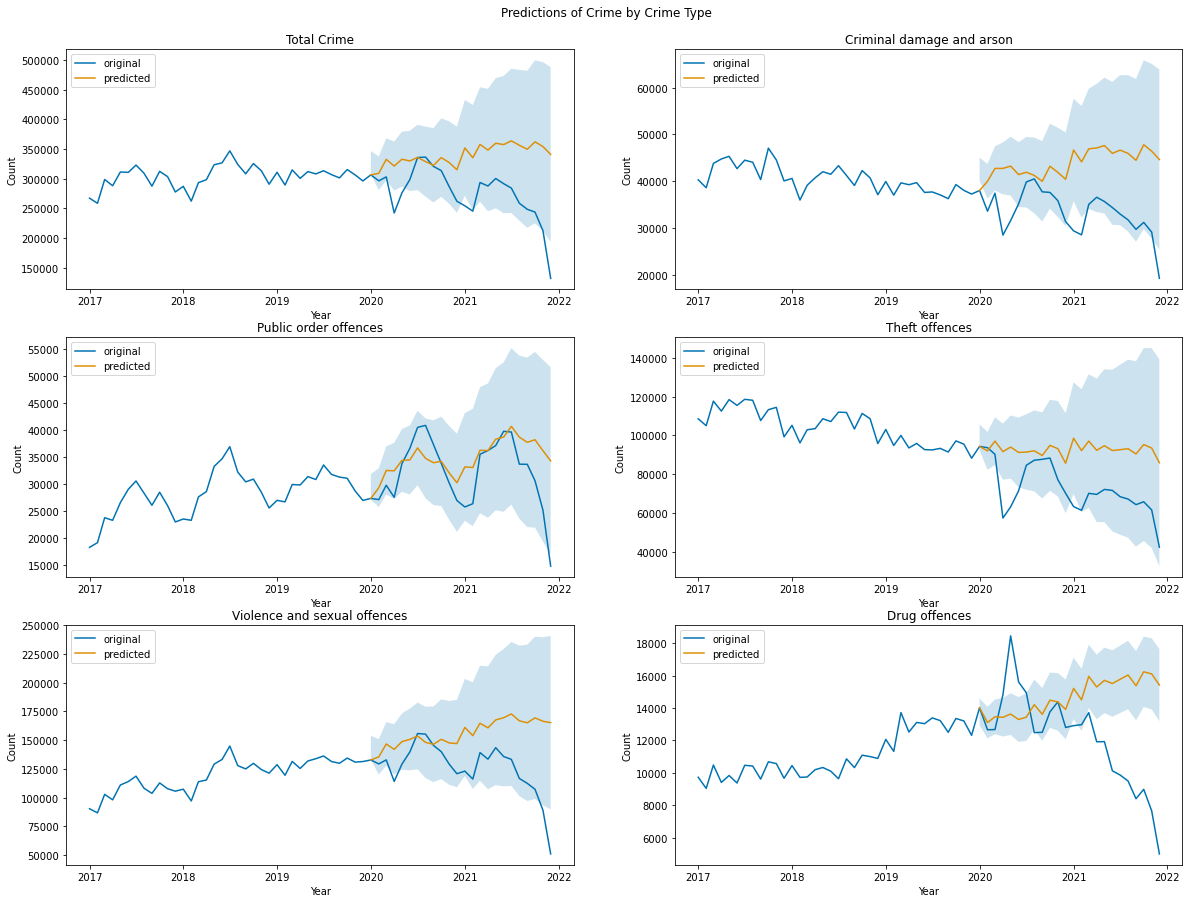

In [61]:
fig,((a1,a2),(a3,a4),(a5,a6)) = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('Predictions of Crime by Crime Type',y=0.92)
predictions2(grouped3,ax=a1)
predictions1(grouped4,'Criminal damage and arson',ax=a2)
#fig2,(a3,a4) = plt.subplots(1,2,figsize=(20,5))
predictions1(grouped4,'Public order offences',ax=a3)
predictions1(grouped4,'Theft offences',ax=a4)
#fig3,(a5,a6) = plt.subplots(1,2,figsize=(20,5))
predictions1(grouped4,'Violence and sexual offences',ax=a5)
predictions1(grouped4,'Drug offences',ax=a6)
#fig.savefig('pred_crime_by_crime_type.jpg')
plt.show()

In [62]:
train_whole = grouped3[:36]
#train_whole

In [63]:
stepwise_fit2 = auto_arima(train_whole,trace=True,suppress_warnings=True,d=1)
stepwise_fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=788.051, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=789.027, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=789.161, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=790.343, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=787.115, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=786.617, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=786.288, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=784.450, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=786.353, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=782.442, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=787.449, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=784.356, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=784.292, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=784.675, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -388.221
Date:                Sun, 03 Jul 2022   AIC                            782.442
Time:                        18:49:50   BIC                            787.108
Sample:                             0   HQIC                           784.052
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0581      0.073     -0.793      0.428      -0.202       0.086
ar.L2          0.1537      0.131      1.170      0.242      -0.104       0.411
sigma2      2.386e+08   6.96e-11   3.43e+18      0.000    2.39e+08    2.39e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.61   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.06   Prob(JB):                         0.46
Heteroskedasticity (H):               0.62   Skew:                            -0.07
Prob(H) (two-sided):                  0.42   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.88e+34. Standard errors may be unstable.
"""